# Farmer Carlos' olive grove - precipitation

Juan’s neighbour, Carlos has a different type of olive trees. They are not so much sensitive to temperature but more to precipitation deficits. He has to irrigate his crops if the monthly precipitation rate is below 1mm/day. Carlos noticed that that his olive trees needed more irrigation in 2015 than in 2010. He does not remember his irrigation practices exactly and wants to check this with the precipitation data for those years. Therefore we will now look at the monthly precipitation rates in the region for 2010 and 2015.

<img src="https://uls.climate.copernicus.eu/delegate/packages/1152/files/7011557f-f459-4243-93e6-cae0d7b7e57b/files/7811.jpg" width="80%"/>

# Question

### How many more months did Carlos have to irrigate his olive trees in 2015 compared to 2010?

# Retrieve monthly precipitation rate from ERA-5

In [ ]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': 'mean_total_precipitation_rate',
        'year': [
            '2010', '2015',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'area': [38, -5, 36, -3], # North, West, South, East. Default: global
        'time': '00:00',
        'format': 'netcdf',
    },
    'era5_precipitation_rate_2010-2015_monthly.nc')

## Convert monthly mean precipitation rate to mm/day

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import cftime
%matplotlib inline

In [2]:
filename = 'era5_precipitation_rate_2010-2015_monthly.nc'
dset = xr.open_dataset(filename, decode_times=True, use_cftime=True)

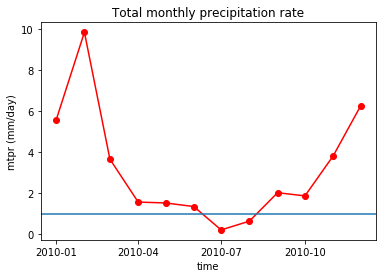

In [3]:
(dset.sel(latitude=37.0, longitude=-4, method="nearest").sel(time=dset.time.dt.year.isin(2010))['mtpr']*86400).plot.line('r-o')
plt.ylabel("mtpr (mm/day)")
plt.title("Total monthly precipitation rate")
plt.axhline(y=1)

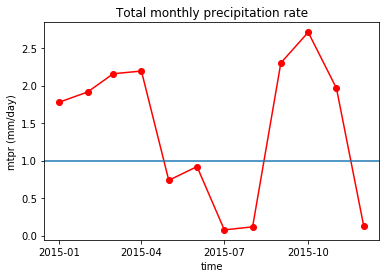

In [4]:
(dset.sel(latitude=37.0, longitude=-4, method="nearest").sel(time=dset.time.dt.year.isin(2015))['mtpr']*86400).plot.line('r-o')
plt.ylabel("mtpr (mm/day)")
plt.title("Total monthly precipitation rate")
plt.axhline(y=1)

### Answer to the question

- How many more months did Carlos have to irrigate his olive trees in 2015 compared to 2010?

In [5]:
precip_2010 = (dset.sel(latitude=37.0, longitude=-4, method="nearest").sel(time=dset.time.dt.year.isin(2010))['mtpr']*86400)
precip_2015 = (dset.sel(latitude=37.0, longitude=-4, method="nearest").sel(time=dset.time.dt.year.isin(2015))['mtpr']*86400)
nb = precip_2015.where(precip_2015 < 1).count() - precip_2010.where(precip_2010 < 1).count()

In [6]:
print("Carlos had to irrigate his olive trees ", nb.values, "more months in 2015 compared to 2010")

Carlos had to irrigate his olive trees  3 more months in 2015 compared to 2010


# Sensitive growing period - precipitation

Olive trees are most sensitive during the period when the new flower buds appear on the plants (usually in March and April as the temperatures begin to rise). During this time it is vital that the trees get their weekly water. If the daily precipiation rate does not reach above 0.1mm/day for seven days in a row, additional irrigation is necessary. Carlos is curious how many more times he had to irrigate in March 2015 compared to March 2010.

<img src="https://uls.climate.copernicus.eu/delegate/packages/1152/files/7011557f-f459-4243-93e6-cae0d7b7e57b/files/7816.jpg" width="70%"/>

# Question

### How many more times Carlos had to irrigate in March 2015 compared to March 2010?

# Retrieve total precipitation for March 2015

In [ ]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': 'total_precipitation',
        'year': [
            '2010', '2015',
        ],
        'month': [
             '03', '04',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
       'area': [37.5, -4.5, 36.5, -3.5], # North, West, South, East. Default: global
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'format': 'netcdf',
    },
    'era5_total_precipitation_2010-2015_hourly.nc')

## Analyze dataset

In [7]:
filename = 'era5_total_precipitation_2010-2015_hourly.nc'
dset = xr.open_dataset(filename, decode_times=True, use_cftime=True)

## Remove 1 hour to time

- To be able to accumulate total precipitation over the right period of time (daily)

In [8]:
import datetime
dset['time'] = dset.time - datetime.timedelta(hours=1)

## Select time period (March 2010 and March 2015)

In [9]:
march_2010 = slice(cftime.DatetimeGregorian(2010, 3, 1, 0, 0, 0), cftime.DatetimeGregorian(2010, 3, 31, 23, 0, 0))
march_2015 = slice(cftime.DatetimeGregorian(2015, 3, 1, 0, 0, 0), cftime.DatetimeGregorian(2015, 3, 31, 23, 0, 0))

# Get precipitation timeseries (mm/day)
- Select location and year
- Convert from meter/day to mm/day

In [10]:
dset_prec_per_day_2010 = dset.sel(latitude=37.0, longitude=-4, method="nearest").sel(time=march_2010).resample(time='1D').sum()*1000.
dset_prec_per_day_2015 = dset.sel(latitude=37.0, longitude=-4, method="nearest").sel(time=march_2015).resample(time='1D').sum()*1000.

In [11]:
dset_prec_per_day_2010_dry = dset_prec_per_day_2010.where(dset_prec_per_day_2010 < 0.1, drop=True).to_dataframe()
dset_prec_per_day_2015_dry = dset_prec_per_day_2015.where(dset_prec_per_day_2015 < 0.1, drop=True).to_dataframe()

In [12]:
dset_prec_per_day_2010_dry.head()

,tp,longitude,latitude
time,,,
2010-03-10 00:00:00,0.000000,-4.0,37.0
2010-03-13 00:00:00,0.003808,-4.0,37.0
2010-03-15 00:00:00,0.000000,-4.0,37.0
2010-03-16 00:00:00,0.000000,-4.0,37.0
2010-03-17 00:00:00,0.000000,-4.0,37.0


In [13]:
dset_prec_per_day_2010_dry['consecutive'] = dset_prec_per_day_2010_dry.index.to_series().diff().dt.days.ne(1).cumsum()
dset_prec_per_day_2015_dry['consecutive'] = dset_prec_per_day_2015_dry.index.to_series().diff().dt.days.ne(1).cumsum()

In [14]:
dset_consecutive_2010_dry = dset_prec_per_day_2010_dry.groupby('consecutive').count()
dset_consecutive_2015_dry = dset_prec_per_day_2015_dry.groupby('consecutive').count()

In [15]:
dset_7_or_more_consecutive_2010_dry = dset_consecutive_2010_dry.where(dset_consecutive_2010_dry['tp']>=7).count()
dset_7_or_more_consecutive_2015_dry = dset_consecutive_2015_dry.where(dset_consecutive_2015_dry['tp']>=7).count()

In [16]:
nb_more = (dset_7_or_more_consecutive_2015_dry - dset_7_or_more_consecutive_2010_dry)['tp']
print("Carlos had to irrigate ", nb_more," times more in March 2015 compared to March 2010.")

Carlos had to irrigate  1  times more in March 2015 compared to March 2010.
